# Vision Lesson Map

<font color=red>Red </font> highlighted is the topic covered for this lesson
1. Image Processing: OpenCV
2. <font color=red>AI Model: 
>* K-Nearest Neighbour (kNN) Algorithm
>* Support Vector (SVM)</font>

# From Traditional Computer Vision to Artificial Intelligence
*Version 1.1*

To navigate up and down, you can use the up and down arrow keys on your keyboard<br />
To execute code in this workbook, select the code block and press **Shift+Enter** <br />
To edit the code block, press enter. 

The codes in this workbook are cumulative. (Variables defined continue to be available until the notebook is closed) <br />
So do start from the top and work your way down to avoid unexpected results!


For more help on using Jupyter Notebook, you can click on Help > User Interface Tour in the menu above, <br />
or visit https://jupyter-notebook.readthedocs.io/en/stable/ui_components.html

Experiment and test out your ideas, for that is one of the fastest ways to learn!

## 1. What if we did not need to manually define rules to solve a classification problem?

In the last workshop, you experimented with various basic image processing techniques, and explored how computers could “see”. You then attempted to make the system recognize you by using objects that you held up in front of the camera. You explored a variety of methods, and many of your creative methods likely involved defining rules or “if-else” logic. For example, rules for what were considered “authorized” colors, position, or a combination of conditions. 

But what if you did not need to define those rules manually?

**Machine Learning** is a subset of Artificial Intelligence that focuses on the ability of machines to learn based on training data. Applied to the field of computer vision, what if we could get the machine to learn what was an “authorized” or “unauthorized” image, instead of having to define rules for the exact color codes?

In today's workshop, we will explore how basic computer vision techniques can be combined with machine learning to solve a variety of challenges.
1. First, we will jump right into building a simple model to illustrate machine learning
1. Then we will take a step back to see the steps involved in building a classification model
1. Next, we use classification models to make inferences and explore the accuracy.
1. Along the way, do look out for and take note of the limitations and motivations for the different methods and techniques used.


## Classifying a card into 1 out of 3 possible categories

Let us take a quick look at the "access cards" challenge again. <br />
Below there are 3 cards (red, green and black cards), and a background scene when no cards are placed in front of the camera.
The top row shows the cards held further away, while the bottom row shows the cards held very close to the web camera.


Please refer to "/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_20/images/cards.png"

<div style="clear:both;"></div>


Let us scope the problem assuming that cards need to be held close to the web camera for validation, then it could just be a matter of comparing the colors of each card (image) to determine which of the 3 cards it is.

## 1.1 Feature Extraction - Selecting what feature(s) to use to help us infer

For this experiment, we have decided to use color to help us to distinguish the cards. But how will we select our color features? Should we select a particular point (e.g. center of the image), or the average color of the image? Should we use a particular channel of the BGR image, or should we convert it to greyscale or any of the other color spaces? 

The selection of our features will impact the robustness of your solution, and selecting irrelevant "features" would not be useful.

For example, if we try to use the camera image size to determine whether or not it was an authorized card, it would NOT be relevant since the camera image size will not change regardless of what card is placed in front of the camera. 

You can try to experiment with different features. <br />
But in the meantime, let us do a quick experiment using the average color as the feature:

In [1]:
from google.colab import drive
drive.mount('/content/Intel_AI4Y')

Mounted at /content/Intel_AI4Y


In [2]:
import cv2
import numpy as np

# Let's read the images into memory
red_card = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardred_close.png")
green_card = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardgreen_close.png")
black_card = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardblack_close.png")
background = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardnone.png")

**Preprocessing and Feature Extraction**

Sometimes, we might need to do preprocessing on our input data to ensure that they are of a consistent format that the model accepts. 

What are some ways that we can preprocess our data?
1. Resizing to a standard size.
2. Changing image orientation.
3. Converting to a particular color space. 

In this particular example, our loaded input images are already in a consistent landscape (640x480) format in the default BGR color space. But our simple model will not be using all the pixels of the image as features for prediction. Instead, we will be using the average color as a feature for the model to infer the class that it belongs to. Hence, we will next be defining a method to extract the average color from each image.

In [3]:
# Define a function to extract our feature (average color)
def averagecolor(image):
    return np.mean(image, axis=(0, 1))

We used np.mean since the average color has 3 channels (and not a single numerical value). To understand how np.mean works, you can refer to the documentation at 
https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html#numpy.mean

**Let's explore: what are the extracted features (average color) for our red and green cards?**

In [4]:
print (averagecolor(red_card))

[ 27.35627604   4.48305664 154.21746094]


In [5]:
print (averagecolor(green_card))

[119.53976563 133.40338216  61.1089388 ]


Notice that the value generated are different? In fact, their values are very far from each other. This is good! This mean that average color is a good feature for this simple problem.

**Now what if we had chosen to use image size as our feature?**

In [6]:
print (red_card.shape)

(480, 640, 3)


In [7]:
print (green_card.shape)

(480, 640, 3)


Would be able to tell the red card and the green card apart if you only knew their shape? 
No! As their shape are identical. 

How about if you knew their average colous?

As we can see above, the average color of the red card and the green card are quite different. But the image size of both cards are exactly the same! Since we want to use the features to tell the cards apart, we will go ahead to use average color to help us to infer the type of cards.

We will now create variables to input the average color value and the label of each image file. We will use this later for model training. Do you remember how this training is done?

In [8]:
# Store the features (average color) and corresponding label (red/green/black/none) for classification
trainX = []
trainY = []

# loop through the cards and print the average color
for (card,label) in zip((red_card,green_card,black_card,background),("red","green","black","none")):
    print((label, averagecolor(card)))
    trainX.append(averagecolor(card))
    trainY.append(label)

('red', array([ 27.35627604,   4.48305664, 154.21746094]))
('green', array([119.53976563, 133.40338216,  61.1089388 ]))
('black', array([70.36474609, 61.85563477, 67.1775651 ]))
('none', array([247.9326888 , 241.13666016, 241.89832357]))


Recall from the previous workshop how the array representation defaults to the order [Blue, Green, Red]

Notice how the red card has a much higher value of red than the rest. For the green card, we see that it has higher values of blue and green, and not just green.

trainX now stores the feature vectors (features), and trainY stores the corresponding labels.

If you are wondering what is stored inside trainX and what is stored inside trainY, do print out the arrays and see for yourself (comparing against the print outs above) It is helpful that you understand how data is being stored at this point.

In [9]:
print(trainX)
print(np.array(trainX).shape)      #Note how the 3 channels are stored in the array

[array([ 27.35627604,   4.48305664, 154.21746094]), array([119.53976563, 133.40338216,  61.1089388 ]), array([70.36474609, 61.85563477, 67.1775651 ]), array([247.9326888 , 241.13666016, 241.89832357])]
(4, 3)


In [10]:
print(trainY)
print(np.array(trainY).shape)

['red', 'green', 'black', 'none']
(4,)


If you take more images, you may find that the average color is not always the same exact value, and it will likely fluctuate due to lighting conditions and camera settings. Hence, training a model usually involves more than just a few images. But we will use just these few images just to illustrate the concept.

# 1.2 Introducing the K-Nearest Neighbour (kNN) Algorithm

When we hold a new card in front of the camera, we want to determine which of these cards it is most similar to. Instead of defining the exact color codes, we might approach it from the angle of "**Which of our known existing cards is the new card most similar to?**"

The concept of k-Nearest Neighbours is to search the set of labelled images for k most-similar images to the new image. And based on that labels of those similar images, predict the label for the new image. 

We will run an experiment below for k=1. That is, to find 1 image with the most similar average color to the new image. And use the label for that image to predict the label for the new image.

Let's break down how this is done!

### First we read the new image into memory

In [11]:
new_card = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/test/16.png")
new_card_features = averagecolor(new_card)

### Calculate the distances between the features (average color) of that new image against the features of the images we know
Read about linealg.norm [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html)

In [12]:
calculated_distances = []
for card in (trainX):
    calculated_distances.append(np.linalg.norm(new_card_features-card))
    
print (calculated_distances)

[117.79791641023513, 113.43645699355922, 33.497714831624535, 340.3000785919897]


### And here is the result of the which card it is most similar to:
Can you guess just by looking at calculated_distances above?

In [13]:
print(trainY[np.argmin(calculated_distances)])

black


Do open the images/test subfolder and check the actual colors of the respective images.

Note that the distance measure we used was "np.linalg.norm()". You can read up more about it at https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.norm.html or Search the Internet for "Euclidean Distance". In simple terms, you can just take it as a measure of how similar the array values of (new_card_features) and (card) are.

Do take some time to also understand what the last line does. Recall what is stored inside trainY in section 1.1.

Check what is stored inside calculated_distances. 
What does np.argmin do? 

Hint: Lookup the documentation for numpy.argmin if necessary.

In [14]:
print(calculated_distances)

[117.79791641023513, 113.43645699355922, 33.497714831624535, 340.3000785919897]


In [15]:
print(np.argmin(calculated_distances))

2


In [16]:
print(trainY)

['red', 'green', 'black', 'none']


In [17]:
print(trainY[np.argmin(calculated_distances)])

black


### Let's try testing another card
Remember to check your folder to ensure that the model can indeed predict what we want!

In [21]:
# First we read the new image into memory
new_card = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/test/36.png")
new_card_features = averagecolor(new_card)

# Calculate the distances between the features (average color) of that new image against the features of the images we know
calculated_distances = []
for card in (trainX):
    calculated_distances.append(np.linalg.norm(new_card_features-card))

# And here is the result of the which card it is most similar to:
print(trainY[np.argmin(calculated_distances)])

red


### How about another card?
Remember to check your folder to ensure that the model can indeed predict what we want!

In [22]:
# First we read the new image into memory
new_card = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/test/56.png")
new_card_features = averagecolor(new_card)

# Calculate the distances between the features (average color) of that new image against the features of the images we know
calculated_distances = []
for card in (trainX):
    calculated_distances.append(np.linalg.norm(new_card_features-card))

# And here is the result of the which card it is most similar to:
print(trainY[np.argmin(calculated_distances)])

green


### Let's try to classify all the test cards

Not bad! It seems that our simplistic model has correctly classified the cards so far. 

Let us try looping over and classifying all the cards in the test subfolder.

In [23]:
from sklearn.metrics import classification_report
# Ground truth for the test images. Open the folder on your computer to see the images.
realtestY = np.array(["black","black","black","black","black",
                     "red","red","red","red","red",
                     "green","green","green","green","green",
                     "none","none","none","none","none"])
def evaluateaccuracy(filenames,predictedY):
    predictedY = np.array(predictedY)
    if (np.sum(realtestY!=predictedY)>0):
        print ("Wrong Predictions: (filename, labelled, predicted) ")
        print (np.dstack([filenames,realtestY,predictedY]).squeeze()[(realtestY!=predictedY)])
    # Calculate those predictions that match (correct), as a percentage of total predictions
    return "Correct :"+ str(np.sum(realtestY==predictedY)) + ". Wrong: "+str(np.sum(realtestY!=predictedY)) + ". Correctly Classified: " + str(np.sum(realtestY==predictedY)*100/len(predictedY))+"%"

Were you surprised that there was no output for the block of code above? That is because we only defined the function to do the accuracy evaluation. To learn more about functions in Python, you can visit [this link](https://www.datacamp.com/community/tutorials/functions-python-tutorial)

Let us run the code block below to see the outputs.

In [26]:
import os
path = "/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/test/"
predictedY = []
filenames = []
for filename in os.listdir(path):
    img = cv2.imread(path+filename)
    img_features = averagecolor(img)
    calculated_distances = []
    for card in (trainX):
        calculated_distances.append(np.linalg.norm(img_features-card))
    prediction = trainY[np.argmin(calculated_distances)]
    
    print (filename + ": " + prediction) #Print out the inferences
    filenames.append(filename)
    predictedY.append(prediction)

# Evaluate Accuracy (the sklearn package provides a useful report)
print ()
print(classification_report(realtestY, predictedY))

# Evaluate Accuracy (our own custom method to output the filenames of the misclassified entries)
print ()
print (evaluateaccuracy(filenames,predictedY))


36.png: red
56.png: green
59.png: green
58.png: none
20.png: black
17.png: black
57.png: green
19.png: black
38.png: red
37.png: red
16.png: black
76.png: none
18.png: black
39.png: red
40.png: red
77.png: none
60.png: green
79.png: none
80.png: none
78.png: none

              precision    recall  f1-score   support

       black       0.20      0.20      0.20         5
       green       0.00      0.00      0.00         5
        none       0.67      0.80      0.73         5
         red       0.40      0.40      0.40         5

    accuracy                           0.35        20
   macro avg       0.32      0.35      0.33        20
weighted avg       0.32      0.35      0.33        20


Wrong Predictions: (filename, labelled, predicted) 
[['36.png' 'black' 'red']
 ['56.png' 'black' 'green']
 ['59.png' 'black' 'green']
 ['58.png' 'black' 'none']
 ['17.png' 'red' 'black']
 ['57.png' 'red' 'green']
 ['19.png' 'red' 'black']
 ['16.png' 'green' 'black']
 ['76.png' 'green' 'none']
 ['18

**What does precision and recall mean?**
Do you remember we've went through these during acquire stage?

Remember the concepts of true positives, false positives, true negatives, and false negatives.

For example, if we are evaluating the red class:
- If you classify a red image correctly as red, that is a true positive.
- If you classify a red image wrongly as black, that is a false negative.
- If you classify another non-red image as red, that is a false positive.
- If you classify a non-red image correctly as non-red, that is a true negative.

Precision is the number of True Positives divided by (True Positives + False Positives) i.e. how many out of that were classified red were actually red.

Recall is the number of True Positives divided by (True Positives + False Negatives) i.e. how many red images were correctly classified red when you tried to get all the red images.

To read more about precision and recall, you can Search the Internet as usual, or visit https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

**Let's Investigate the misclassified image**

Open up that folder and check the images. 
It seems that 58.png was classified wrongly. Why?

58.png

Please refer to "/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_20/images/test/58.png"

<div style="clear:both;"></div>

Recall our initial set of training images. <br />
58.png looks much brighter than the training image for "green", which may suggest why it was mistaken as "none" (which was the "brightest" among the 4 training images)

Please refer to "/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_20/images/cards.png"

<div style="clear:both;"></div>



For us as humans, it is easy for us to tell that 58.png should be classified as green. 

However, remember that the feature we used to "train" the system was "average color" and we only supplied one training image. 

It seem that the average color of 58.png is closer to the average color of the background (background.png) rather than the training image (cardgreen_close.png). 

It will be left as an exercise for you to calculate the average color of the images respectively and uncover why it was misclassified. That will be your Challenge 1 later in this notebook.

Meanwhile, can you think of a way to improve the model?

### Open the folder of test images!
You can open the folder of test images. Do they appear to be under different lighting conditions? We only trained our system using a single example for each colored card so far. Do you think having more training images might help?

 ## 1.3 Training with more samples
 
How about training it with more samples? <br />
Recall what we did in section 1.1 to get trainX and trainY. If you have forgotten, do revisit section 1.1 to understand the code better.

In [27]:
trainX2 = []
trainY2 = []
import os

# Let's loop through the training images in the 4 folders in the image subdirectory
path = "/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/"
for label in ('red','green','black','none'):
    print ("Loading training images for the label: "+label)
    
    #Load all images inside the subfolder
    for filename in os.listdir(path+label+"/"): 
        img = cv2.imread(path+label+"/"+filename)
        img_features = averagecolor(img)
        trainX2.append(img_features)
        trainY2.append(label)

Loading training images for the label: red
Loading training images for the label: green
Loading training images for the label: black
Loading training images for the label: none


### Task: How many images do we use to train our model now?

In [28]:
print (len(trainX2))
print (len(trainY2))

60
60


### Task: Check with the subfolders!
Open the red, green, black and none subfolders in the images directory on your computer. How many images are we loading in from each folder?

### After having loaded more training images, let us re-run the test

In [29]:
import os
path = "/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/test/"
filenames = []
predictedY = []
for filename in os.listdir(path):
    img = cv2.imread(path+filename)
    img_features = averagecolor(img)
    calculated_distances = []
    for card in (trainX2):
        calculated_distances.append(np.linalg.norm(img_features-card))
    prediction =  trainY2[np.argmin(calculated_distances)]
    
    print (filename + ": " + prediction)
    filenames.append(filename)
    predictedY.append(prediction)

# Evaluate Accuracy (the sklearn package provides a useful report)
print ()
print(classification_report(realtestY, predictedY))

# Evaluate Accuracy
print (evaluateaccuracy(filenames,predictedY))

36.png: red
56.png: green
59.png: green
58.png: green
20.png: black
17.png: black
57.png: green
19.png: black
38.png: red
37.png: red
16.png: black
76.png: none
18.png: black
39.png: red
40.png: red
77.png: none
60.png: green
79.png: none
80.png: none
78.png: none

              precision    recall  f1-score   support

       black       0.20      0.20      0.20         5
       green       0.00      0.00      0.00         5
        none       0.80      0.80      0.80         5
         red       0.40      0.40      0.40         5

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.35      0.35      0.35        20

Wrong Predictions: (filename, labelled, predicted) 
[['36.png' 'black' 'red']
 ['56.png' 'black' 'green']
 ['59.png' 'black' 'green']
 ['58.png' 'black' 'green']
 ['17.png' 'red' 'black']
 ['57.png' 'red' 'green']
 ['19.png' 'red' 'black']
 ['16.png' 'green' 'black']
 ['76.png' 'green' 'none']
 ['1

**What have we just done?**

We have just seen how we "trained" the model for the kNN in section 1.1, and then used the model to predict which class the new card belonged to in section 1.2. We then went further in section 1.3 to explore how increasing the training data could help to improve the accuracy, eliminating the earlier error of misclassifying "58.png" as none when it was actually green.

We used a very simplified example of the kNN algorithm which finds the k Nearest Neighbours to predict the class of the new image based on its closest neighbours. In the example above, the value of k was 1. Hence, we only searched for the nearest neighbour (the neighbour with the smallest calculated distance), and predicted the value of the test image based on the class of the nearest neighbour.


### Take a moment to reflect

How does this method compare to the methods used in the previous workshop? 

Did you require more or less lines of code? Do you prefer defining the rules or letting the machine learn by itself? For most of you, you would probably find it easier to provide a set of training images than to have to define the rules manually. If you found it easier to define the rules and still had a rather robust system, what techniques did you use?

How can we improve the system further? Would a mix of approaches do even better? Will this work with all types of images? Why or why not? Do write your notes in the Student Activity Guide.

<br />
<video controls src="images/black_red_green.mp4" style="width:400px;" />

## 2. Basic steps for building a classification model

In section 1, we have quickly jumped into implementing a very simple classification model based on the kNN algorithm.
In practice, training of computer vision models is typically done using frameworks like Keras, Tensorflow, Caffe, and MXNet, or libraries such as Scikit-Learn for Python. These frameworks and libraries contain various tools and make it easier to work with larger data sets and algorithms without having to code everything from scratch. 

Training can take hours, days or even weeks, often requiring machines with GPUs and more powerful compute capabilities. The model we built for kNN was a simplistic one using numpy arrays, for the sake of illustrating the concepts.

Let us now explore the steps typically required for building a classification model (some of which were already done for you in this exercise):
1. Gathering data
1. Data Preparation (cleaning, labelling, etc.)
1. Splitting the data into a training set and a test set
1. Selecting an algorithm and training a model
1. Evaluating the performance

Selecting the algorithm to use was just one out of the 5 steps. For machine learning algorithms, the data preparation is very important. If you feed in wrong information, the model will naturally turn out wrong. The data needs to be representative and the features used needs to be relevant to your purpose. Otherwise, you may get very unreliable results.

Similarly, any prior preprocessing and the features that you use for the model is important. Imagine trying to train a model that recognizes flowers of different colors but only using greyscale images (leaving out the important color features). In contrast, for optical character recognition (OCR), color may not be very useful and might not be included in the selected features for the model.

## 3. That was kNN, how about Support Vector Machines?

If you think about it, the k-Nearest-Neighbour algorithm did not really learn much, it basically stored the training data and did a lookup everytime an inference on a new image was required. 

In your math class, do you remember learning about deriving the equation of a line **y = mx + c?**

What if we could also derive an equation or formula that could be used to predict the different classes?


## What are Support Vectors?

Imagine you needed to classify O from X. Could you draw a single line that best separates all the X from the O?

Please refer to "/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_20/images/svm1.jpg"

<div style="clear:both;"></div>

Perhaps we could draw a line (blue line below). And this is a simple example of a Support Vector.  Anything to the left/top of the line could be classified as X, and anything to the right/bottom of the line could be classified as O. 

Please refer to "/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_20/images/svm2.jpg"

<div style="clear:both;"></div>


Note: The math behind SVM will be outside the scope of this workshop, but you are encouraged to read more. https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-1/ (In the link, it illustrates with diagrams how a single linear vector can separate 2 distinct classes)

Let us go on to explore how Support Vector Machines (SVM) work in practice, making use of the python scikit-learn library. First, "derive the equation" of the Support Vector, then "use the equation" to run the predictions.

### First train the model

In [30]:
# Since SVM uses numerical values, we first encode our labels into numerical
from sklearn.preprocessing import LabelEncoder  #encode labels into numerical
encoder = LabelEncoder()                        #encode labels into numerical
encodedtrainY2 = encoder.fit_transform(trainY2) #encode labels into numerical

from sklearn import svm
model = svm.SVC(gamma="scale", decision_function_shape='ovr')
model.fit(trainX2, encodedtrainY2)

SVC()

What does LabelEncoder do? Let's look at the function result. 
You can read more about LabelEncoder [here](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621)

In [31]:
print (encodedtrainY2)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In-depth understanding of SVM is beyond the scope of this moodule, but feel free to learn more [here](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)

Now, we have obtained our SVM model.  

### Let's run the predictions!

In [32]:
import os
path = "/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/test/"
filenames = []
predictedY = []
for filename in os.listdir(path):
    img = cv2.imread(path+filename)
    img_features = averagecolor(img)
    prediction = model.predict([img_features])[0]
    
    #decode the prediction
    prediction = encoder.inverse_transform([prediction])[0]
    
    print (filename + ": " + prediction)
    filenames.append(filename)
    predictedY.append(prediction)

# Evaluate Accuracy (the sklearn package provides a useful report)
print ()
print(classification_report(realtestY, predictedY))

# Evaluate Accuracy
print (evaluateaccuracy(filenames,predictedY))

36.png: red
56.png: green
59.png: green
58.png: green
20.png: black
17.png: black
57.png: green
19.png: black
38.png: red
37.png: red
16.png: black
76.png: none
18.png: black
39.png: red
40.png: red
77.png: none
60.png: green
79.png: none
80.png: none
78.png: none

              precision    recall  f1-score   support

       black       0.20      0.20      0.20         5
       green       0.00      0.00      0.00         5
        none       0.80      0.80      0.80         5
         red       0.40      0.40      0.40         5

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.35      0.35      0.35        20

Wrong Predictions: (filename, labelled, predicted) 
[['36.png' 'black' 'red']
 ['56.png' 'black' 'green']
 ['59.png' 'black' 'green']
 ['58.png' 'black' 'green']
 ['17.png' 'red' 'black']
 ['57.png' 'red' 'green']
 ['19.png' 'red' 'black']
 ['16.png' 'green' 'black']
 ['76.png' 'green' 'none']
 ['1

### Which one is more accurate?

Do you think SVM is more effective at getting more correct classifications than kNN or vice versa? 

It depends on the problem. And for SVM, there are also other parameters that will need to be tuned that are outside the scope of this workshop. These parameters will guide the model generation process. For example, the model needs to know what kind of Support Vector to generate. A "straight line" might work for some datasets, but for others, we might need a curve or more complex support vectors.

For illustration, imagine trying to fit a straight line to classify the Os and Xs below. Perhaps you might need an equation for a circle instead.

Please refer to "/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_20/"images/svm3.jpg"

<div style="clear:both;"></div>

You can refer to the links at the end of this section if you wish to find out more.

Up to this point, trained out model using trainX2 and trainY2, then tested our model against a separate set of images and it seemed to perform well. However, working well on a small test set does not mean that it will always work well. Let us test again on another image that has not been tested before. The human eye can easily tell which color it is. But will the model that seems to be working perfectly so far be able to classify it correctly?

Please refer to "/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_20/images/cardtestagain.png"

<div style="clear:both;"></div>


In [37]:
imagenew = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardtestagain.png")
imagenew_features = averagecolor(imagenew)
prediction = (model.predict([imagenew_features])[0])

#decode the prediction from numerical to labels
print(encoder.inverse_transform([prediction])[0])

red


### What went wrong?

Unfortunately, the image appears to be wrongly classified as green instead of red. <br />
It would be hard to dig into why the SVM model classified wrongly in this instance without digging deep into the math which is outside the scope of this workshop. A simple analogy would be that it might be difficult to try to fit a curve into the equation for a straight line. Just like how y=mx+c would be the wrong equation to use for a curve.

**Side Tip:** When designing solutions using machine learning, aim to train the most accurate model but do also take some time to plan for contingencies when the model may not give the correct result. Also consider what could be the impacts of wrong results on your application, and take steps to mitigate the risks. For example, if it is piece of machinary being guided by computer vision, are there other sensors that can also be used to trigger an emergency stop before it crashes into something.

Meanwhile, What does our kNN algorithm think about the same image?

In [38]:
calculated_distances = []
for card in (trainX2):
    calculated_distances.append(np.linalg.norm(imagenew_features-card))
print(trainY2[np.argmin(calculated_distances)])

red


### Does that mean kNN is always more reliable?

Let's try one more image:

Please refer to "/content/Intel_AI4Y/My Drive/Intel_AI4Y_Colab/Module_20/images/cardtestagain2.png"

<div style="clear:both;"></div>

In [39]:
imagenew = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardtestagain2.png")
imagenew_features = averagecolor(imagenew)
calculated_distances = []
for card in (trainX2):
    calculated_distances.append(np.linalg.norm(imagenew_features-card))
    
print("SVM: "+str(encoder.inverse_transform([ model.predict([imagenew_features])[0] ])[0]))
print("kNN: "+str(trainY2[np.argmin(calculated_distances)]))

SVM: none
kNN: none


In the image above, can you guess why kNN wrongly classified the algorithm as none instead of green? 

You can calculate the average color of the image to find out why.

And yes, you can train the model with more images to mitigate these issues.


_Note: The math behind SVM will be outside the scope of this workshop, but you are encouraged to read more. https://www.svm-tutorial.com/2014/11/svm-understanding-math-part-1/ _ (In the link, it illustrates with diagrams how a single linear vector can separate 2 distinct classes)

In our experiment, however, we used it to separate more than 2 classes. You can learn more about the multi-class classification using SVM and view code samples using the documentation at https://scikit-learn.org/stable/modules/svm.html#multi-class-classification And do remember to Search the Internet if you need more help.

## Congratulations! 

## It's now time for you to do some hands on! 

You have completed a very quick introduction to machine learning, and seen the progression from a rule based approach to a machine learning approach. You have also used training data to train the kNN and SVM models for classification, and seen the results as well as some limitations. There is certainly a lot more to be learnt, but you can already start building!

Anytime you need some help, you can always search your friendly Internet. Here are some quicklinks to help: <br />
- https://docs.opencv.org/4.0.0/d2/d96/tutorial_py_table_of_contents_imgproc.html
- https://scikit-learn.org/stable/documentation.html

**Tip:** Remember the basic computer vision techniques that you picked up at the previous workshop. You can make use of them as you think of what features would be useful for feeding into your model. Color spaces, Thresholding, Contour Detection, Geometric Transformations, direct manipulation of image numpy arrays and more. Sometimes, basic methods can be the most effective for the task at hand.

Whatever you build, keep in mind your purpose and objective and think of different possible approaches. Also keep in mind the possible impacts when a machine learning algorithm makes a misclassification and plan for ways to mitigate the risks. For example, if you know that your model identifies red cards very well but sometimes mixes up green and blue cards, then you might want to design a solution using red cards instead of green and blue. And you might add in other layers of check such as, if a green/black card is detected, require a security personnel to perform a second layer check.

As with other scenarios where there may be a probability of error, explore complementing the design of your real-world solutions with other techniques or hardware sensors.

### <font color=red>Challenge 1: What is the average color of "images/test/58.png"?</font> 

Remember that it was initially classified incorrectly? Let us explore why.
Store the result in a variable "cha1"

In [49]:
cha1 = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/test/58.png")
cha1 = averagecolor(cha1)
print(cha1)

[208.77603841 223.6275293  120.75616536]


### <font color=red>Challenge 2: What is the average color of "images/background.png"?</font> 

Store the result in a variable "cha2"

In [50]:
cha2 = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/background.png")
cha2 = averagecolor(cha2)
print(cha2)

[247.9326888  241.13666016 241.89832357]


### <font color=red>Challenge 3: What is the average color of "images/cardgreen_close.png"?</font> 

Store the result in a variable "cha3"

In [51]:
cha3 = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardgreen_close.png")
cha3 = averagecolor(cha3)
print(cha3)

[119.53976563 133.40338216  61.1089388 ]


### <font color=red>Challenge 4: 58.png vs Background. Calculate the distance between cha1 and cha2</font> 

Recall how the euclidean distance was calculated in section 1.2

In [57]:
calculated_distances_cha1_cha2 = []
calculated_distances_cha1_cha2.append(np.linalg.norm(cha1-cha2))
print(calculated_distances_cha1_cha2)

[128.51161592391296]


### <font color=red>Challenge 5: 58.png vs Green. Calculate the distance between cha1 and cha3</font> 

Recall how the euclidean distance was calculated in section 1.2

In [56]:
calculated_distances_cha1_cha3 = []
calculated_distances_cha1_cha3.append(np.linalg.norm(cha1-cha3))
print(calculated_distances_cha1_cha3)

[140.21876031305771]


Is the distance in Challenge 4 (58.png vs. background) or the distance in Challenge 5 (58.png vs. green) smaller?

A smaller distance implies a greater similarity. Hence, 58.png was classified as more similar to the background, than to the green card based on the 4 "training images".

### <font color=red>Challenge 6: Modify the function averagecolor to convert the image to greyscale before extracting the features</font> 

Recall how you converted an image to greyscale in the previous workshop. Calculate the accuracy of the kNN model when we use average greyscale instead of averagecolor. (i.e. Run section 1.3 using your updated averagecolor function. Rerun both the training and inference steps) What is the new accuracy? Does it perform better? Why do you think so?

In [60]:
# You can modify the function below
import cv2
path = "/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/test/"
def averagecolor_grey(image):
    image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return(image_grey)

filenames = []
predictedY = []
for filename in os.listdir(path):
    img = cv2.imread(path+filename)
    img_grey = averagecolor_grey(img)
    img_features = averagecolor(img_grey)
    calculated_distances = []    
    for card in (trainX2):
        calculated_distances.append(np.linalg.norm(img_features-card))
    prediction =  trainY2[np.argmin(calculated_distances)]
    
    print (filename + ": " + prediction)
    filenames.append(filename)
    predictedY.append(prediction)

# Evaluate Accuracy (the sklearn package provides a useful report)
print ()
print(classification_report(realtestY, predictedY))

# Evaluate Accuracy
print (evaluateaccuracy(filenames,predictedY))



36.png: black
56.png: black
59.png: black
58.png: green
20.png: black
17.png: black
57.png: green
19.png: black
38.png: black
37.png: black
16.png: black
76.png: none
18.png: black
39.png: black
40.png: black
77.png: none
60.png: black
79.png: none
80.png: none
78.png: none

              precision    recall  f1-score   support

       black       0.31      0.80      0.44         5
       green       0.00      0.00      0.00         5
        none       0.80      0.80      0.80         5
         red       0.00      0.00      0.00         5

    accuracy                           0.40        20
   macro avg       0.28      0.40      0.31        20
weighted avg       0.28      0.40      0.31        20

Wrong Predictions: (filename, labelled, predicted) 
[['58.png' 'black' 'green']
 ['17.png' 'red' 'black']
 ['57.png' 'red' 'green']
 ['19.png' 'red' 'black']
 ['38.png' 'red' 'black']
 ['37.png' 'red' 'black']
 ['16.png' 'green' 'black']
 ['76.png' 'green' 'none']
 ['18.png' 'green' 'blac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bonus Topic: Beyond classification, can we localize where the colored card is within the image using what we have learnt?

Since we used average color as the feature for our model, could we also use it to classify each individual pixel within the image, rather than just classifying the entire image?

Knowing which pixels belong to the "color class" could help us to understand where in the image our card is. This is an example of _localization_. 

Let's use the 3 sample images to do this experiment. images/cardblack.png, images/cardred.png, images/cardgreen.png

For a start, can we identify where the red card is in the picture?

In [61]:
# Here's a simpler way to use the kNN classifier from the sklearn package. 
# We don't need to write it from scratch now that we know how it works
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=1)
knnmodel.fit(trainX2, trainY2) 

KNeighborsClassifier(n_neighbors=1)

Localization


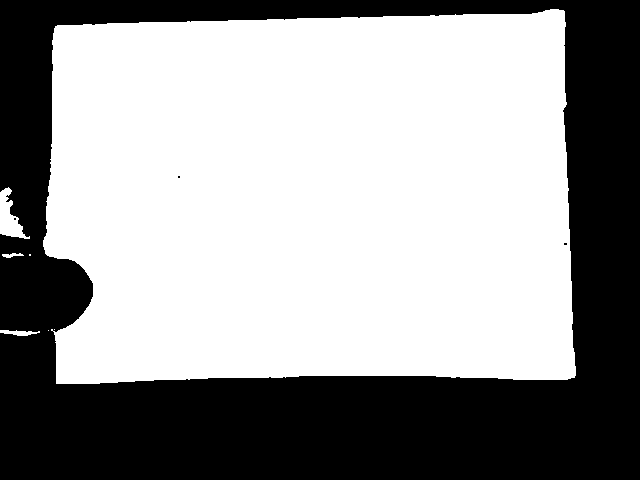

Marked Card


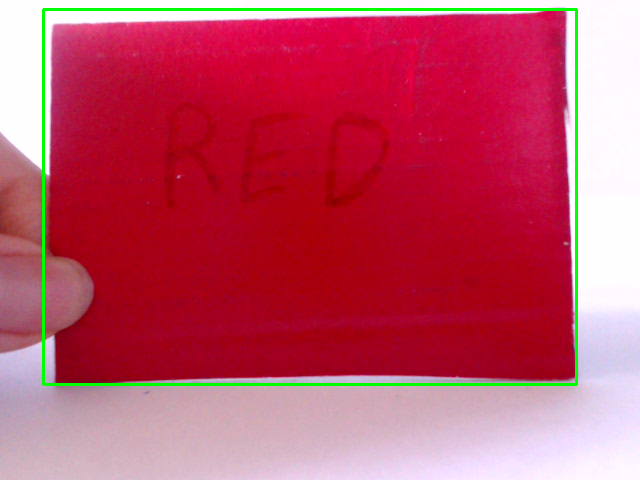

In [62]:
from google.colab.patches import cv2_imshow

card_localization = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardred.png")

# First we will need to arrange the pixels into a format that our model accepts (a 2D array)
# We can use the numpy array methods to help us do that easily
temp = card_localization.reshape((307200,3)) 

#predict the color of each pixel
prediction = knnmodel.predict(temp)             

# We can arrange the predictions back into the shape of the image that we are familiar with
masklabels = (prediction.reshape((480,640)))

#create a mask for the class we are interested in! (Recall what are masks in the previous workshop)
canvas = np.zeros(card_localization.shape[:2],dtype="uint8")
canvas[masklabels=="red"]=255

#get the largest blob and find the location
(cnts,_) = cv2.findContours(canvas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda cnts: cv2.boundingRect(cnts)[1])[:1]  #sort contours from top to bottom.
for (i, c) in enumerate(cnts):    
    (x, y, w, h) = cv2.boundingRect(c)                  
    cv2.rectangle(card_localization, (x,y), (x+w,y+h), (0,255,0),2)     # Draw the bounding boxes in red


#Display the results
print("Localization")
cv2_imshow(canvas)
print("Marked Card")
cv2_imshow(card_localization) #see the bounding box drawn here
cv2.waitKey(0)
cv2.destroyAllWindows()

Using the same concept, we could also perform _image segmentation_ which is basically assigning a class label to each pixel. In the example below, you can visualize the 4 labels "red", "green", "black" and "none" (represented by white)

Image Segmentation


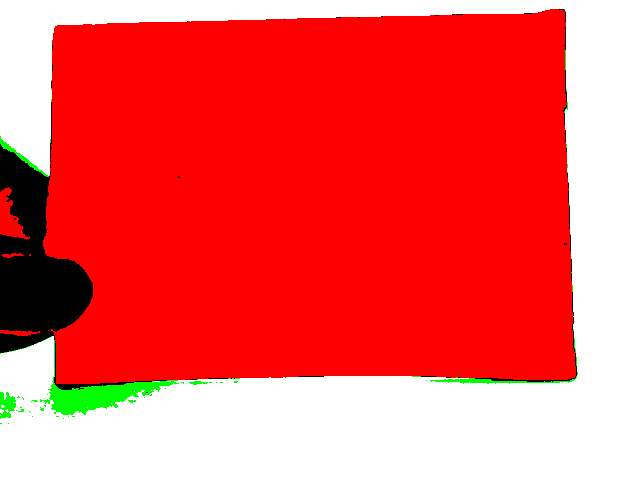

Original Card


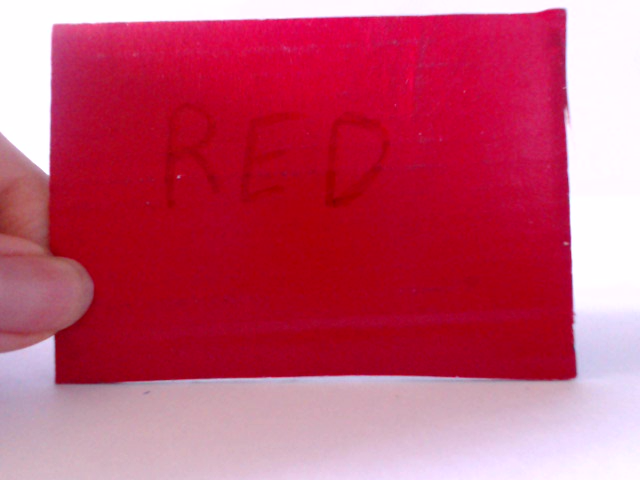

In [63]:
from google.colab.patches import cv2_imshow

card_localization = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardred.png")

# First we will need to arrange the pixels into a format that our model accepts (a 2D array)
# We can use the numpy array methods to help us do that easily
temp = card_localization.reshape((307200,3)) 

#predict the color of each pixel
prediction = knnmodel.predict(temp)             

# We can arrange the predictions back into the shape of the image that we are familiar with
masklabels = (prediction.reshape((480,640)))

#create a mask for the class we are interested in! (Recall what are masks in the previous workshop)
canvas = np.zeros(card_localization.shape,dtype="uint8")
canvas[masklabels=="green"]=(0,255,0)
canvas[masklabels=="red"]=(0,0,255)
canvas[masklabels=="black"]=(0,0,0)
canvas[masklabels=="none"]=(255,255,255)

#Display the results
print("Image Segmentation")
cv2_imshow(canvas)
print("Original Card")
cv2_imshow(card_localization)
#cv2.imshow("Masked Image",cv2.bitwise_and(card_localization,card_localization,mask=canvas))
cv2.waitKey(0)
cv2.destroyAllWindows()

Image segmentation is used for applications such as medical imaging and video surveillance. This is because they not only need to know what is in the image, but also to identify parts of the image that may be more important than others. For example, marking a possible tumour in the medical scan, or a suspicious person in the CCTV. 

Notice that our model does have some imperfections, and how some parts of the fingers are wrongly inferred as black or red. Nonetheless, this example serves to illustrate the concept of image segmentation.

### <font color=red>Challenge 7: Which distance calculation metric does the sklearn kNN model use by default? Is it also the euclidean distance that we used?</font> 

You can look up https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# metric : string or callable, default ‘minkowski’
# the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 
# See the documentation of the DistanceMetric class for a list of available metrics.

### <font color=red>Challenge 8: Using the kNN algorithm, mask out just the red card from "images/cardmixed.png", and calculate the fraction of red pixels vs. total number of pixels in that image</font> 

Image Segmentation


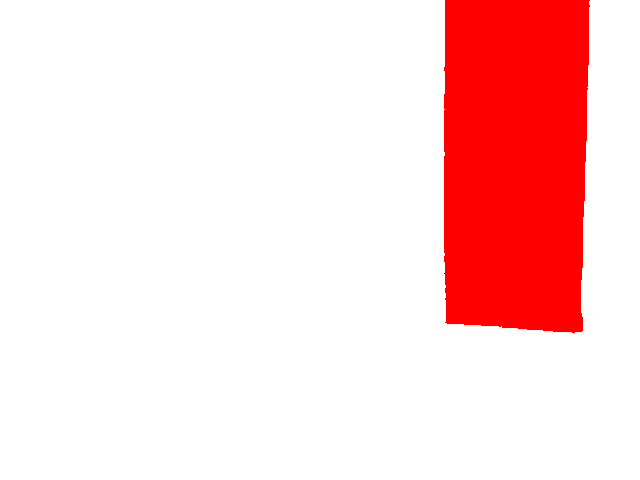

Original Card


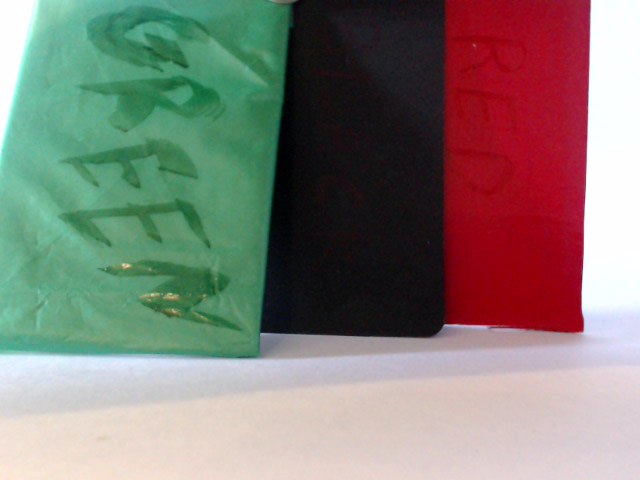

In [64]:
from google.colab.patches import cv2_imshow

card_localization = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardmixed.png")

# First we will need to arrange the pixels into a format that our model accepts (a 2D array)
# We can use the numpy array methods to help us do that easily
temp = card_localization.reshape((307200,3)) 

#predict the color of each pixel
prediction = knnmodel.predict(temp)             

# We can arrange the predictions back into the shape of the image that we are familiar with
masklabels = (prediction.reshape((480,640)))

#create a mask for the class we are interested in! (Recall what are masks in the previous workshop)
canvas = np.zeros(card_localization.shape,dtype="uint8")
canvas[masklabels=="green"]=(255,255,255)
canvas[masklabels=="red"]=(0,0,255)
canvas[masklabels=="black"]=(255,255,255)
canvas[masklabels=="none"]=(255,255,255)

#Display the results
print("Image Segmentation")
cv2_imshow(canvas)
print("Original Card")
cv2_imshow(card_localization)
#cv2.imshow("Masked Image",cv2.bitwise_and(card_localization,card_localization,mask=canvas))
cv2.waitKey(0)
cv2.destroyAllWindows()

Localization


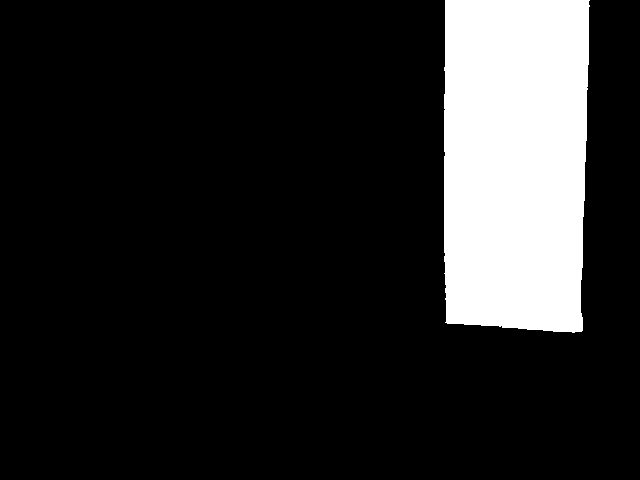

Marked Card


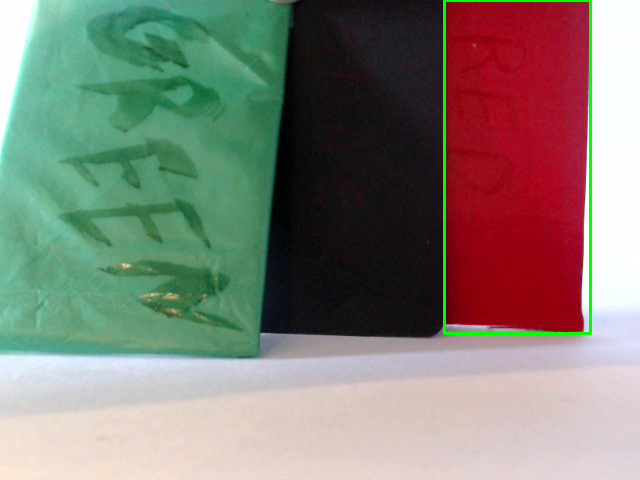

In [66]:


card_localization = cv2.imread("/content/Intel_AI4Y/My Drive/Intel_AI4Y/Students_E_Learning/Copy_To_Google_Drive/Intel_AI4Y_Colab/Module_20/images/cardmixed.png")

# First we will need to arrange the pixels into a format that our model accepts (a 2D array)
# We can use the numpy array methods to help us do that easily
temp = card_localization.reshape((307200,3)) 

#predict the color of each pixel
prediction = knnmodel.predict(temp)             

# We can arrange the predictions back into the shape of the image that we are familiar with
masklabels = (prediction.reshape((480,640)))

#create a mask for the class we are interested in! (Recall what are masks in the previous workshop)
canvas = np.zeros(card_localization.shape[:2],dtype="uint8")
canvas[masklabels=="red"]=255

#get the largest blob and find the location
(cnts,_) = cv2.findContours(canvas, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=lambda cnts: cv2.boundingRect(cnts)[1])[:1]  #sort contours from top to bottom.
for (i, c) in enumerate(cnts):    
    (x, y, w, h) = cv2.boundingRect(c)                  
    cv2.rectangle(card_localization, (x,y), (x+w,y+h), (0,255,0),2)     # Draw the bounding boxes in red


#Display the results
print("Localization")
cv2_imshow(canvas)
print("Marked Card")
cv2_imshow(card_localization) #see the bounding box drawn here
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
print('full size of picture:')
print(card_localization.shape)
print('sized of red card:')
print(w,'x',h)


full size of picture:
(480, 640, 3)
sized of red card:
146 x 333


In [69]:
#find fraction
red_total_fraction = np.count_nonzero(canvas)/(480*640)
print(red_total_fraction)

0.15045247395833333


Note: In this case, we happened to be able to use the model to predict the class of each pixel because our model was built using color as a feature. However this method may not always be applicable depending on the features used for different models. You can search the Internet to explore other methods of localization. 

Artificial Neural Networks (ANN), specifically Convolutional Neural Networks (CNN) have recently become very popular due to their much higher level of effectiveness. In the next workshop, we will explore the use of some pre-trained CNNs, together with how we might run inferences using the Intel Movidus Neural Compute Stick 2 (NCS2), that is powered by the Intel Myriad VPU.

Have you heard of the DJI Tello drones? They make use of computer vision to improve the flight quality too, and they are also powered by an Intel MYRIAD VPU!
https://www.movidius.com/news/hello-tello-ryze-announces-intel-myriad-vpu-powered-toy-drone

If you remember, earlier in this lesson we also discussed about complementing machine vision with other sensors. What other sensors do you think are onboard the Tello drone apart from the camera?
https://www.ryzerobotics.com/tello/specs

What do you think the range finder and the barometer are used to sense?